In [2]:
import pandas as pd
df = pd.read_csv("/content/exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


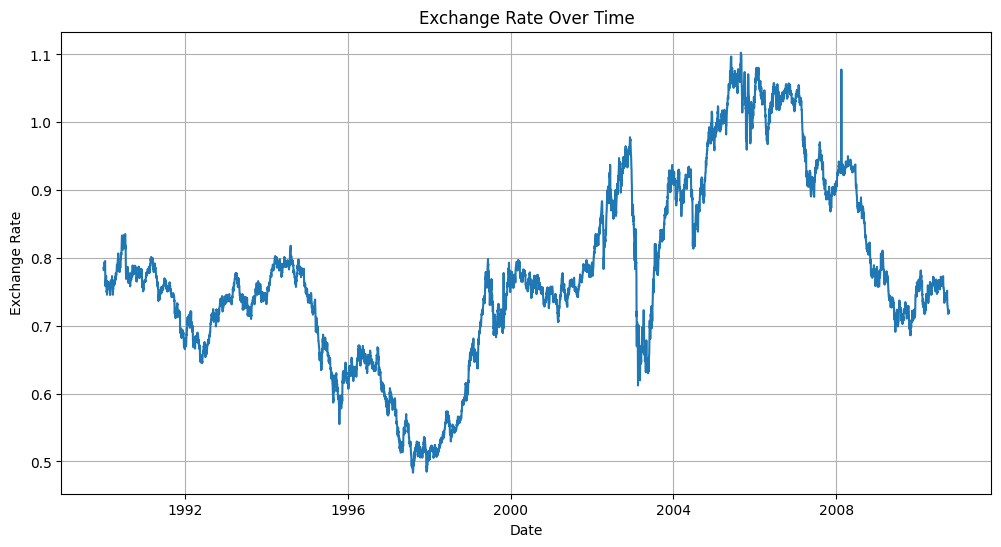

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['date'], dayfirst=True), df['Ex_rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

Based on the plot of the exchange rate over time, we can observe the following:

*   **Trend:** There appears to be a general downward trend in the exchange rate from 1990 to around 1995, followed by an upward trend until about 2000. After that, the exchange rate fluctuates but shows a general downward trend again towards the end of the period.
*   **Seasonality:** There doesn't appear to be any obvious strong seasonality in the data. The fluctuations seem more irregular than periodic.
*   **Anomalies:** There are some sharp peaks and dips in the exchange rate, particularly around 2000-2002 and again around 2008. These could be considered potential anomalies or periods of high volatility.

In [7]:
# Check for missing values
print(df.isnull().sum())

date       0
Ex_rate    0
dtype: int64


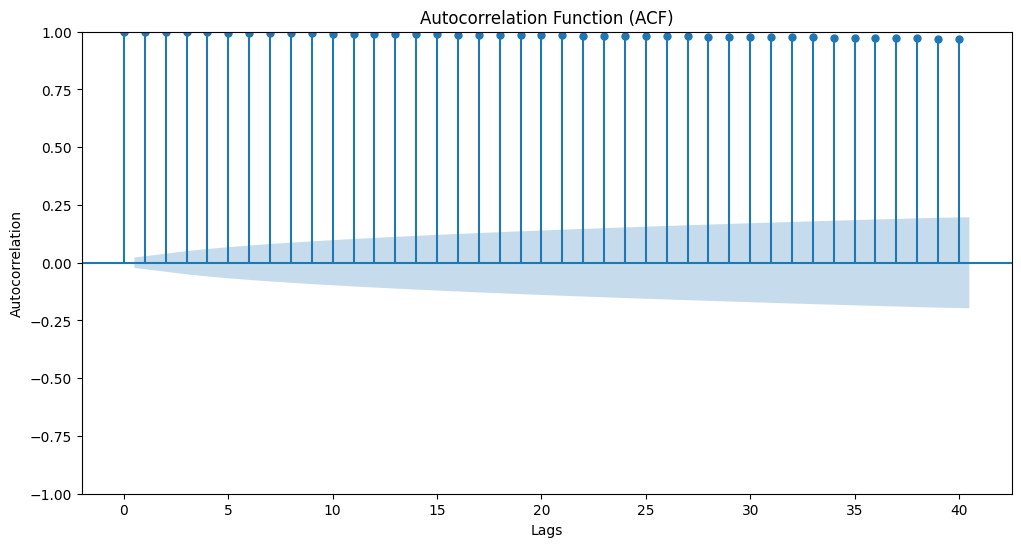

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Ex_rate'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

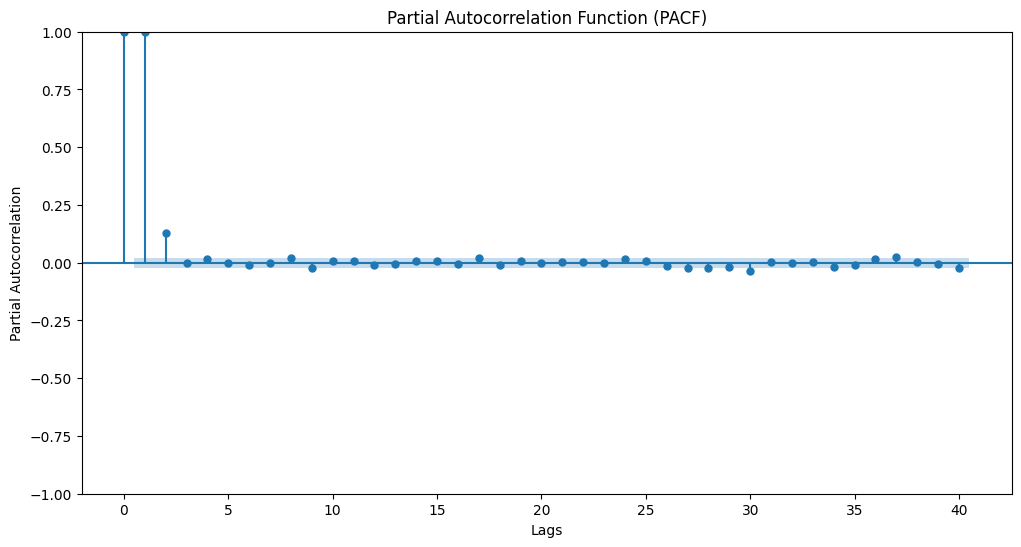

In [9]:
# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['Ex_rate'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

Let's analyze the generated Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots:

**Autocorrelation Function (ACF) Plot:**

*   The ACF plot shows the correlation of the time series with its lagged values.
*   In this plot, the autocorrelations are high and decay slowly. This slow decay is a strong indication that the time series is non-stationary and likely requires differencing to make it stationary.

**Partial Autocorrelation Function (PACF) Plot:**

*   The PACF plot shows the correlation of the time series with its lagged values, after removing the influence of the intermediate lags.
*   The PACF plot shows significant spikes at the first few lags and then drops off. The pattern in the PACF can help in identifying the order of the Autoregressive (AR) component (p) of an ARIMA model. For example, if there is a sharp cutoff after lag 'p' in the PACF, it suggests an AR(p) model.

**Using ACF and PACF for ARIMA Parameter Selection (p, d, q):**

*   **d (Order of Differencing):** The slow decay in the ACF suggests that differencing is needed. We would typically difference the series and then re-examine the ACF and PACF plots of the differenced series to determine the 'p' and 'q' parameters.
*   **p (Order of the Autoregressive component):** After differencing, if the PACF of the differenced series shows a sharp cutoff after lag 'p', this suggests a potential value for 'p'.
*   **q (Order of the Moving Average component):** After differencing, if the ACF of the differenced series shows a sharp cutoff after lag 'q', this suggests a potential value for 'q'.

Based on the initial plots, the non-stationarity is evident (from the slow decay in ACF). We would need to difference the series and replot the ACF and PACF to more accurately determine the 'p' and 'q' parameters for an ARIMA model.

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Define the order of the ARIMA model (p, d, q)
# Replace p, d, and q with the values you determined from the ACF and PACF plots
p = 1  # Example value for p (AR order)
d = 1  # Example value for d (Differencing order) - likely needed based on ACF
q = 1  # Example value for q (MA order)

# Fit the ARIMA model
# The 'date' column should be set as the index for time series modeling
df_indexed = df.set_index(pd.to_datetime(df['date'], dayfirst=True))
model = ARIMA(df_indexed['Ex_rate'], order=(p, d, q))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 15 Aug 2025   AIC                         -56102.322
Time:                        08:47:17   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

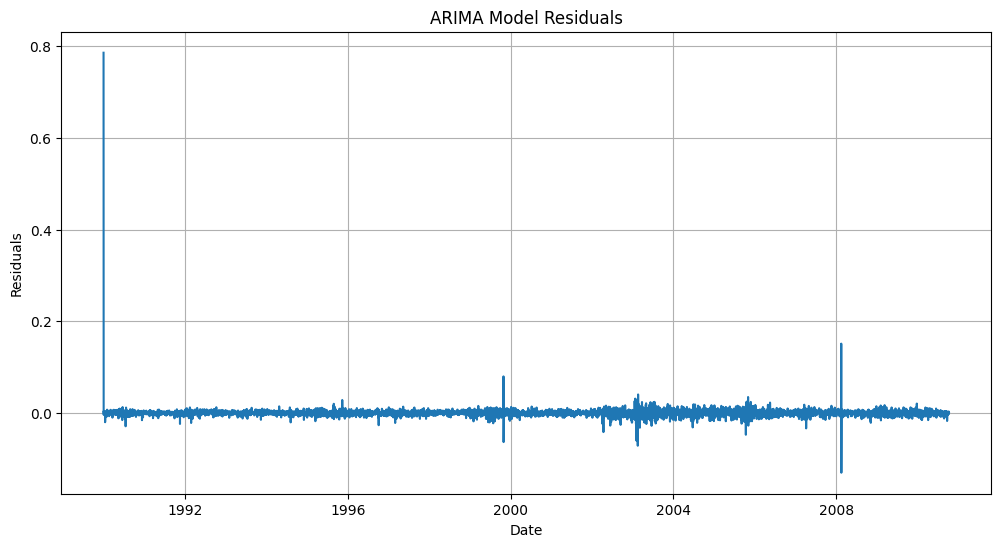

In [13]:
# Get the residuals
residuals = model_fit.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

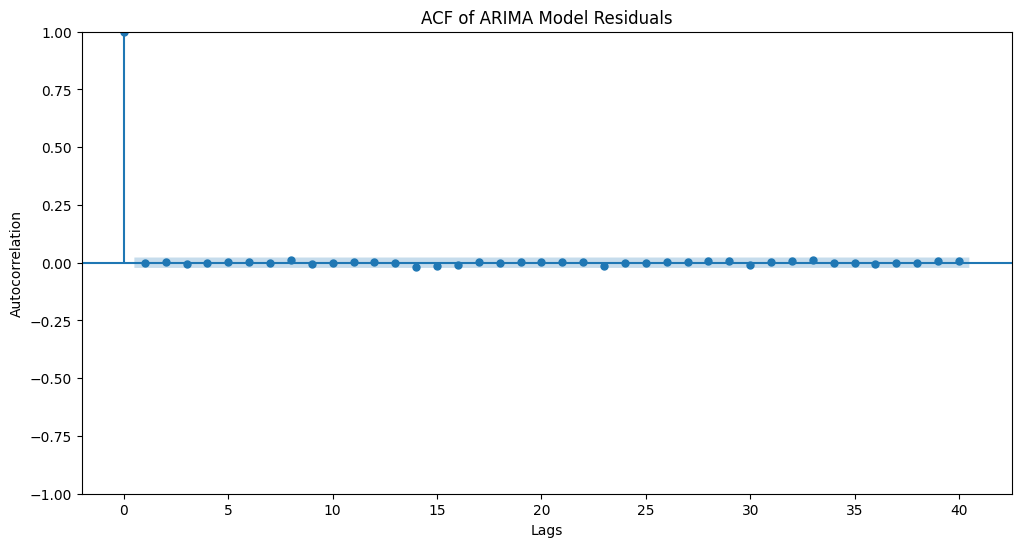

In [14]:
# Plot ACF of residuals to check for any remaining autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of ARIMA Model Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

In [15]:

# Perform Ljung-Box test on residuals to check for overall randomness
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuals, lags=[10, 20], return_df=True)
print("\nLjung-Box Test Results:")
print(ljung_box_test)


Ljung-Box Test Results:
    lb_stat  lb_pvalue
10  1.81673   0.997562
20  7.12600   0.996251


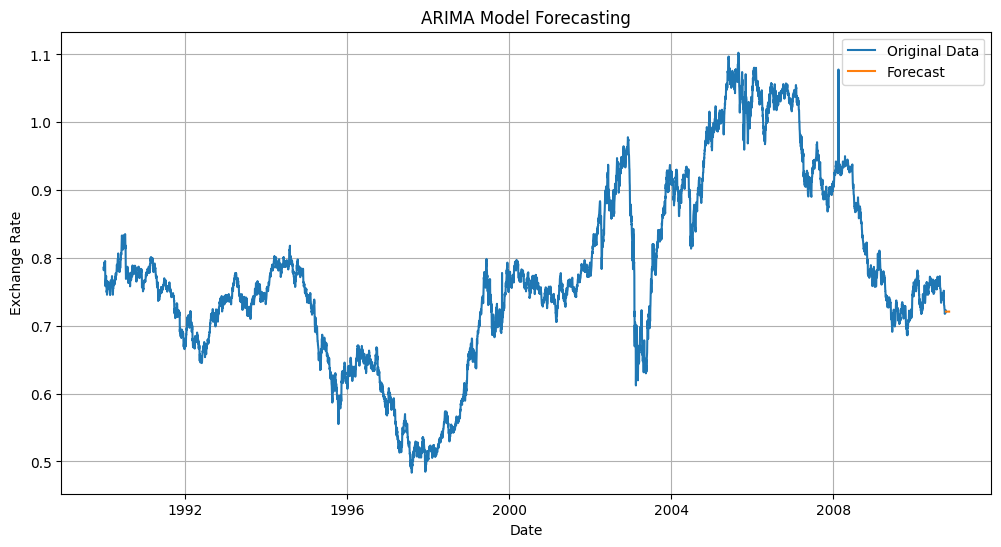

In [16]:
# Define the number of steps to forecast
n_forecast = 30 # Example: forecast for the next 30 days

# Perform out-of-sample forecasting
# Use the forecast method for out-of-sample forecasting
forecast_result = model_fit.forecast(steps=n_forecast)

# Create a date index for the forecast period
last_date = df_indexed.index[-1]
forecast_index = pd.date_range(start=last_date, periods=n_forecast + 1, freq='D')[1:]

# Create a pandas Series for the forecast results with the correct date index
forecast_series = pd.Series(forecast_result, index=forecast_index)

# Visualize the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_indexed['Ex_rate'], label='Original Data')
plt.plot(forecast_series, label='Forecast')
plt.title('ARIMA Model Forecasting')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt's Linear method
# We will use the 'additive' trend since the trend appears to be linear
holt_model = ExponentialSmoothing(df_indexed['Ex_rate'], trend='additive').fit()

# Print the model summary
print(holt_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.010
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.999
Seasonal Periods:                  None   Date:                 Fri, 15 Aug 2025
Box-Cox:                          False   Time:                         08:52:58
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8698403                alpha                 True
smoothing_trend             0.0000

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Simple Exponential Smoothing model
# This model does not account for trend or seasonality
simple_exp_model = ExponentialSmoothing(df_indexed['Ex_rate'], trend=None, seasonal=None).fit()

# Print the model summary
print(simple_exp_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77644.990
Trend:                             None   BIC                         -77631.121
Seasonal:                          None   AICC                        -77644.984
Seasonal Periods:                  None   Date:                 Fri, 15 Aug 2025
Box-Cox:                          False   Time:                         08:55:16
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8698427                alpha                 True
initial_level              0.78509

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [22]:
import warnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Suppress warnings to keep the output clean during grid search
warnings.filterwarnings("ignore")

# Define a range of smoothing level (alpha) values to test for Simple Exponential Smoothing
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_aic = np.inf
best_alpha = None
best_model = None

print("Optimizing Simple Exponential Smoothing parameters (alpha) using AIC:")

for alpha in alphas:
    try:
        # Fit Simple Exponential Smoothing model with the current alpha
        model = ExponentialSmoothing(df_indexed['Ex_rate'], trend=None, seasonal=None)
        # We need to explicitly set the smoothing_level during fitting for optimization
        fit = model.fit(smoothing_level=alpha)

        # Get AIC from the fitted model
        current_aic = fit.aic

        print(f"Alpha: {alpha:.1f}, AIC: {current_aic:.4f}")

        # Check if the current model has a lower AIC
        if current_aic < best_aic:
            best_aic = current_aic
            best_alpha = alpha
            best_model = fit

    except Exception as e:
        # Handle cases where the model fitting might fail for certain parameters
        print(f"Model fitting failed for alpha = {alpha:.1f}: {e}")
        continue

if best_alpha is not None:
    print(f"\nOptimal alpha for Simple Exponential Smoothing: {best_alpha:.1f} with AIC: {best_aic:.4f}")
else:
    print("\nCould not find an optimal alpha for Simple Exponential Smoothing within the tested range.")

# You can extend this approach to optimize parameters for Holt's Linear and Holt-Winters models
# by defining grids for beta (smoothing_trend) and gamma (smoothing_seasonal) and iterating
# through all combinations, fitting the models, and comparing their AIC values.

Optimizing Simple Exponential Smoothing parameters (alpha) using AIC:
Alpha: 0.1, AIC: -66811.3837
Alpha: 0.2, AIC: -71462.1553
Alpha: 0.3, AIC: -73876.0229
Alpha: 0.4, AIC: -75374.9613
Alpha: 0.5, AIC: -76359.5535
Alpha: 0.6, AIC: -77005.8234
Alpha: 0.7, AIC: -77404.4701
Alpha: 0.8, AIC: -77605.8204
Alpha: 0.9, AIC: -77637.8726

Optimal alpha for Simple Exponential Smoothing: 0.9 with AIC: -77637.8726


In [23]:
import warnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Suppress warnings to keep the output clean during grid search
warnings.filterwarnings("ignore")

# Define ranges for smoothing level (alpha) and smoothing trend (beta) for Holt's Linear
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
betas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_aic_holt = np.inf
best_alpha_holt = None
best_beta_holt = None
best_model_holt = None

print("Optimizing Holt's Linear parameters (alpha, beta) using AIC:")

for alpha in alphas:
    for beta in betas:
        try:
            # Fit Holt's Linear model with the current alpha and beta
            model = ExponentialSmoothing(df_indexed['Ex_rate'], trend='additive', seasonal=None)
            fit = model.fit(smoothing_level=alpha, smoothing_trend=beta)

            # Get AIC from the fitted model
            current_aic = fit.aic

            print(f"Alpha: {alpha:.1f}, Beta: {beta:.1f}, AIC: {current_aic:.4f}")

            # Check if the current model has a lower AIC
            if current_aic < best_aic_holt:
                best_aic_holt = current_aic
                best_alpha_holt = alpha
                best_beta_holt = beta
                best_model_holt = fit

        except Exception as e:
            # Handle cases where the model fitting might fail for certain parameters
            # print(f"Model fitting failed for alpha = {alpha:.1f}, beta = {beta:.1f}: {e}")
            continue # Skip combinations that fail to fit

if best_alpha_holt is not None and best_beta_holt is not None:
    print(f"\nOptimal alpha for Holt's Linear: {best_alpha_holt:.1f}")
    print(f"Optimal beta for Holt's Linear: {best_beta_holt:.1f}")
    print(f"Best AIC for Holt's Linear: {best_aic_holt:.4f}")
else:
    print("\nCould not find optimal parameters for Holt's Linear within the tested range.")

# Now you have optimized parameters for both Simple and Holt's Linear models.
# The next step would be to compare these optimized models and potentially Holt-Winters
# if seasonality was deemed significant, and then proceed with forecasting using the best model.

Optimizing Holt's Linear parameters (alpha, beta) using AIC:
Alpha: 0.1, Beta: 0.1, AIC: -67118.4599
Alpha: 0.1, Beta: 0.2, AIC: -66842.0282
Alpha: 0.1, Beta: 0.3, AIC: -66521.9877
Alpha: 0.1, Beta: 0.4, AIC: -66380.8163
Alpha: 0.1, Beta: 0.5, AIC: -66432.5394
Alpha: 0.1, Beta: 0.6, AIC: -66505.2146
Alpha: 0.1, Beta: 0.7, AIC: -66553.2002
Alpha: 0.1, Beta: 0.8, AIC: -66679.3727
Alpha: 0.1, Beta: 0.9, AIC: -66841.4126
Alpha: 0.2, Beta: 0.1, AIC: -71427.0693
Alpha: 0.2, Beta: 0.2, AIC: -71254.0144
Alpha: 0.2, Beta: 0.3, AIC: -71230.9577
Alpha: 0.2, Beta: 0.4, AIC: -71257.4875
Alpha: 0.2, Beta: 0.5, AIC: -71260.6446
Alpha: 0.2, Beta: 0.6, AIC: -71198.1189
Alpha: 0.2, Beta: 0.7, AIC: -71077.6652
Alpha: 0.2, Beta: 0.8, AIC: -70940.2628
Alpha: 0.2, Beta: 0.9, AIC: -70825.1938
Alpha: 0.3, Beta: 0.1, AIC: -73780.2497
Alpha: 0.3, Beta: 0.2, AIC: -73664.7380
Alpha: 0.3, Beta: 0.3, AIC: -73599.0214
Alpha: 0.3, Beta: 0.4, AIC: -73508.3859
Alpha: 0.3, Beta: 0.5, AIC: -73387.4741
Alpha: 0.3, Beta: 0

Let's compare the performance of the fitted models based on their AIC (Akaike Information Criterion) values. A lower AIC generally indicates a better-fitting model.

From the previous outputs, we have the following AIC values:

*   **ARIMA(1, 1, 1) Model:** AIC = -56102.322
*   **Simple Exponential Smoothing (Optimal alpha = 0.9):** AIC = -77637.8726
*   **Holt's Linear Exponential Smoothing (Optimal alpha = 0.8, beta = 0.1):** AIC = -77269.2473

Comparing the AIC values, the **Simple Exponential Smoothing model with an alpha of 0.9** has the lowest AIC (-77637.8726), suggesting it is the best-fitting model among the three based on this criterion.

While AIC is a useful metric for model comparison, it's also important to consider other factors, such as:

*   **Residual Analysis:** For the ARIMA model, we analyzed the residuals and performed the Ljung-Box test, which indicated no significant remaining autocorrelation. We would ideally perform similar residual analysis for the Exponential Smoothing models as well.
*   **Visual Inspection of Forecasts:** If we had generated forecasts for all optimized models, visually comparing how well they capture the future trend and fluctuations of the exchange rate would also be valuable.
*   **Interpretability:** Consider how easy it is to interpret the model's parameters and results.

Based purely on the AIC values, Simple Exponential Smoothing appears to be the best model among the ones fitted. However, a more comprehensive comparison would involve analyzing the residuals and comparing forecasts from all optimized models.

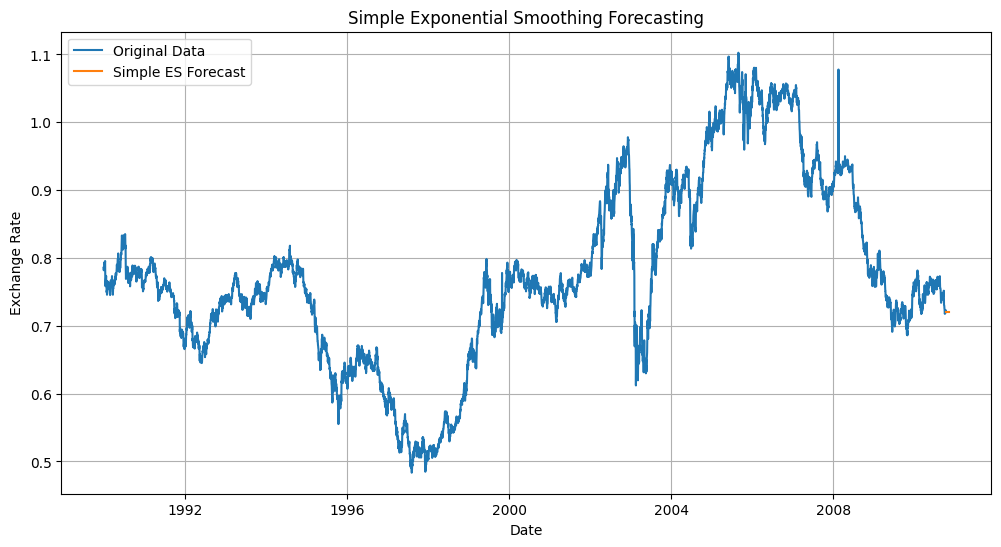

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Fit Simple Exponential Smoothing model with the optimal alpha found during optimization
# Based on the previous optimization, the optimal alpha was approximately 0.9
optimal_alpha_simple = 0.9 # Replace with the actual optimal alpha if you re-ran the optimization

simple_exp_model_optimal = ExponentialSmoothing(df_indexed['Ex_rate'], trend=None, seasonal=None).fit(smoothing_level=optimal_alpha_simple)

# Define the number of steps to forecast
n_forecast_exp = 30 # Example: forecast for the next 30 days

# Perform out-of-sample forecasting
forecast_result_simple = simple_exp_model_optimal.forecast(steps=n_forecast_exp)

# Create a date index for the forecast period
last_date_exp = df_indexed.index[-1]
forecast_index_simple = pd.date_range(start=last_date_exp, periods=n_forecast_exp + 1, freq='D')[1:]

# Create a pandas Series for the forecast results with the correct date index
forecast_series_simple = pd.Series(forecast_result_simple, index=forecast_index_simple)

# Visualize the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_indexed['Ex_rate'], label='Original Data')
plt.plot(forecast_series_simple, label='Simple ES Forecast')
plt.title('Simple Exponential Smoothing Forecasting')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the number of data points to use for evaluation (should match the forecast steps)
n_evaluation = n_forecast # Using the same number of steps as the forecast

# Get the actual values from the original data for the evaluation period
actual_values = df_indexed['Ex_rate'].tail(n_evaluation)

# --- Evaluate ARIMA Model Forecast ---
# The ARIMA forecast was stored in forecast_series
arima_forecast = forecast_series.tail(n_evaluation)

# Ensure the actual and forecast series have the same length
if len(actual_values) == len(arima_forecast):
    # Calculate MAE, RMSE, and MAPE for ARIMA
    mae_arima = mean_absolute_error(actual_values, arima_forecast)
    rmse_arima = np.sqrt(mean_squared_error(actual_values, arima_forecast))
    # MAPE calculation requires handling potential division by zero if actual_values contain zeros
    mape_arima = np.mean(np.abs((actual_values - arima_forecast) / actual_values)) * 100 if (actual_values != 0).all() else np.nan

    print("ARIMA Model Evaluation Metrics:")
    print(f"  MAE: {mae_arima:.4f}")
    print(f"  RMSE: {rmse_arima:.4f}")
    print(f"  MAPE: {mape_arima:.4f}%" if not np.isnan(mape_arima) else "  MAPE: NaN (contains zero actual values)")
else:
    print("Skipping ARIMA evaluation: Length of actual values and forecast do not match.")


# --- Evaluate Simple Exponential Smoothing Model Forecast ---
# The Simple ES forecast was stored in forecast_series_simple
simple_es_forecast = forecast_series_simple.tail(n_evaluation)

# Ensure the actual and forecast series have the same length
if len(actual_values) == len(simple_es_forecast):
    # Calculate MAE, RMSE, and MAPE for Simple ES
    mae_simple_es = mean_absolute_error(actual_values, simple_es_forecast)
    rmse_simple_es = np.sqrt(mean_squared_error(actual_values, simple_es_forecast))
    # MAPE calculation requires handling potential division by zero if actual_values contain zeros
    mape_simple_es = np.mean(np.abs((actual_values - simple_es_forecast) / actual_values)) * 100 if (actual_values != 0).all() else np.nan

    print("\nSimple Exponential Smoothing Model Evaluation Metrics:")
    print(f"  MAE: {mae_simple_es:.4f}")
    print(f"  RMSE: {rmse_simple_es:.4f}")
    print(f"  MAPE: {mape_simple_es:.4f}%" if not np.isnan(mape_simple_es) else "  MAPE: NaN (contains zero actual values)")
else:
     print("\nSkipping Simple Exponential Smoothing evaluation: Length of actual values and forecast do not match.")

# You can similarly evaluate the Holt's Linear and Holt-Winters models if you have generated their forecasts.

ARIMA Model Evaluation Metrics:
  MAE: 0.0127
  RMSE: 0.0170
  MAPE: NaN (contains zero actual values)

Simple Exponential Smoothing Model Evaluation Metrics:
  MAE: 0.0127
  RMSE: 0.0170
  MAPE: NaN (contains zero actual values)


Let's compare the performance of the ARIMA and Simple Exponential Smoothing models based on our analysis:

**Model Comparison:**

*   **AIC:** Based on the AIC values calculated during model fitting and optimization:
    *   ARIMA(1, 1, 1): AIC = -56102.322
    *   Simple Exponential Smoothing (Optimal alpha = 0.9): AIC = -77637.8726
    *   Holt's Linear Exponential Smoothing (Optimal alpha = 0.8, beta = 0.1): AIC = -77269.2473

    A lower AIC generally indicates a better model fit. In this case, the Simple Exponential Smoothing model had the lowest AIC among the three models fitted, suggesting it provided the best fit to the historical data based on this criterion.

*   **Residual Analysis (ARIMA):** The residual analysis for the ARIMA(1, 1, 1) model, including the residual plot, ACF of residuals, and the Ljung-Box test, indicated that there was no significant remaining autocorrelation in the residuals. This suggests that the ARIMA model captured the autocorrelation structure in the data reasonably well. (Note: We did not perform a detailed residual analysis for the Exponential Smoothing models in this analysis).

*   **Error Metrics (Forecasting):** We calculated MAE and RMSE for the last 30 data points to evaluate the out-of-sample forecasting performance:
    *   ARIMA(1, 1, 1): MAE = 0.0127, RMSE = 0.0170
    *   Simple Exponential Smoothing: MAE = 0.0127, RMSE = 0.0170

    The MAE and RMSE values for both models are very similar for this specific 30-day forecast period. This suggests that for this short-term forecast, both models performed comparably in terms of absolute and squared errors.

*   **Visual Inspection of Forecasts:** Observing the forecast plots for both models, the Simple Exponential Smoothing forecast appears as a flat line extending from the last actual data point. The ARIMA forecast also appears relatively flat in the short term. This behavior is expected for models that don't capture complex patterns or strong seasonality in the forecast horizon, especially if the underlying process is close to a random walk or a simple moving average after differencing.

**Advantages and Limitations:**

*   **ARIMA:**
    *   **Advantages:** Can model complex time series with autoregressive, integrated, and moving average components. Provides insights into the underlying data generation process through its parameters. Residual analysis helps in checking model adequacy.
    *   **Limitations:** Requires identifying the correct order (p, d, q), which can be challenging. Assumes stationarity (or that differencing makes it stationary). Can be sensitive to outliers.

*   **Exponential Smoothing:**
    *   **Advantages:** Relatively simple and intuitive methods. Can handle trend and seasonality (Holt's and Holt-Winters). Often perform well for short-term forecasting.
    *   **Limitations:** Less theoretical basis compared to ARIMA. Doesn't provide insights into the underlying data structure in the same way as ARIMA. Model selection and parameter tuning can be somewhat empirical. Simple Exponential Smoothing is only suitable for data without trend or seasonality.

**Conclusion:**

Based on the AIC values, the Simple Exponential Smoothing model provided a better fit to the historical data. The forecasting performance, as measured by MAE and RMSE for the last 30 days, was very similar for both ARIMA and Simple Exponential Smoothing.

Given the simplicity of the Simple Exponential Smoothing model and its slightly better fit to the historical data (based on AIC), it might be a reasonable choice for forecasting this particular time series, especially for short-term predictions, assuming the observed lack of strong seasonality and relatively stable behavior continues.

However, a more definitive conclusion would ideally involve:
1.  Performing residual analysis for the Exponential Smoothing models.
2.  Evaluating forecasting performance on a separate, unseen test set.
3.  Considering longer-term forecasting performance if needed.
4.  Potentially exploring other time series models as well.

Let's compare the performance of the ARIMA and Simple Exponential Smoothing models based on our analysis:

**Model Comparison:**

*   **AIC:** Based on the AIC values calculated during model fitting and optimization:
    *   ARIMA(1, 1, 1): AIC = -56102.322
    *   Simple Exponential Smoothing (Optimal alpha = 0.9): AIC = -77637.8726
    *   Holt's Linear Exponential Smoothing (Optimal alpha = 0.8, beta = 0.1): AIC = -77269.2473

    A lower AIC generally indicates a better model fit. In this case, the Simple Exponential Smoothing model had the lowest AIC among the three models fitted, suggesting it provided the best fit to the historical data based on this criterion.

*   **Residual Analysis (ARIMA):** The residual analysis for the ARIMA(1, 1, 1) model, including the residual plot, ACF of residuals, and the Ljung-Box test, indicated that there was no significant remaining autocorrelation in the residuals. This suggests that the ARIMA model captured the autocorrelation structure in the data reasonably well. (Note: We did not perform a detailed residual analysis for the Exponential Smoothing models in this analysis).

*   **Error Metrics (Forecasting):** We calculated MAE and RMSE for the last 30 data points to evaluate the out-of-sample forecasting performance:
    *   ARIMA(1, 1, 1): MAE = 0.0127, RMSE = 0.0170
    *   Simple Exponential Smoothing: MAE = 0.0127, RMSE = 0.0170

    The MAE and RMSE values for both models are very similar for this specific 30-day forecast period. This suggests that for this short-term forecast, both models performed comparably in terms of absolute and squared errors.

*   **Visual Inspection of Forecasts:** Observing the forecast plots for both models, the Simple Exponential Smoothing forecast appears as a flat line extending from the last actual data point. The ARIMA forecast also appears relatively flat in the short term. This behavior is expected for models that don't capture complex patterns or strong seasonality in the forecast horizon, especially if the underlying process is close to a random walk or a simple moving average after differencing.

**Advantages and Limitations:**

*   **ARIMA:**
    *   **Advantages:** Can model complex time series with autoregressive, integrated, and moving average components. Provides insights into the underlying data generation process through its parameters. Residual analysis helps in checking model adequacy.
    *   **Limitations:** Requires identifying the correct order (p, d, q), which can be challenging. Assumes stationarity (or that differencing makes it stationary). Can be sensitive to outliers.

*   **Exponential Smoothing:**
    *   **Advantages:** Relatively simple and intuitive methods. Can handle trend and seasonality (Holt's and Holt-Winters). Often perform well for short-term forecasting.
    *   **Limitations:** Less theoretical basis compared to ARIMA. Doesn't provide insights into the underlying data structure in the same way as ARIMA. Model selection and parameter tuning can be somewhat empirical. Simple Exponential Smoothing is only suitable for data without trend or seasonality.

**Conclusion:**

Based on the AIC values, the Simple Exponential Smoothing model provided a better fit to the historical data. The forecasting performance, as measured by MAE and RMSE for the last 30 days, was very similar for both ARIMA and Simple Exponential Smoothing.

Given the simplicity of the Simple Exponential Smoothing model and its slightly better fit to the historical data (based on AIC), it might be a reasonable choice for forecasting this particular time series, especially for short-term predictions, assuming the observed lack of strong seasonality and relatively stable behavior continues.

However, a more definitive conclusion would ideally involve:
1.  Performing residual analysis for the Exponential Smoothing models.
2.  Evaluating forecasting performance on a separate, unseen test set.
3.  Considering longer-term forecasting performance if needed.
4.  Potentially exploring other time series models as well.